# Pandas: grouping

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from termcolor import colored

In [38]:
cars = pd.read_csv("C:/Users/tomma/Documents/data_science/berlin/TommasoLaboratories/data/labs/vehicles.csv")

In [39]:
cars.head(5)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


How many Car models? 

In [40]:
def modelsNum(col): 
    print(colored("NUMBER OF MODELS:", attrs=['bold']))   
    num = len(col.unique())
    print(colored(f"{num}"))
    return num

In [41]:
numModels = modelsNum(cars['Model'])

NUMBER OF MODELS:
3608


group by the data by the Make  using count function

In [42]:
def numBrands(df): 
    num = df.groupby(["Make"]).count()
    num = num.iloc[:,0]
    return num

In [43]:
brands = numBrands(cars)  
brands 

Make
AM General                        4
ASC Incorporated                  1
Acura                           302
Alfa Romeo                       41
American Motors Corporation      22
                               ... 
Volkswagen                     1047
Volvo                           717
Wallace Environmental            32
Yugo                              8
smart                            20
Name: Model, Length: 127, dtype: int64

Converting Grams/Mile to Grams/Km

1 Mile = 1.60934 Km

Grams/Mile * Mile/Km -> Grams/Mile * 1 Mile/1.60934Km

$$ \frac{Grams}{Mile} * \frac{Mile}{Km} $$

$$ \frac{Grams}{Mile} * \frac{1 Mile}{1.60934Km}  $$

convert MPG columns to km_per_liter

MPG = Miles/Gallon -> Km/Liter

1 Mile = 1.60934 Km

1 Gallon = 3.78541 Liters

$$ \frac{Miles}{Gallon} -> \frac{Miles}{Gallon} * \frac{Km}{Miles} * \frac{Gallon}{Liters}$$

$$ \frac{Miles}{Gallon} -> \frac{Miles}{Gallon} * \frac{1.60934Km}{ 1Miles} * \frac{1 Gallon}{3.78541 Liters}$$

* ( 1.60934 / 3.78541 )


In [44]:
def MilesToKm(col): 
    newCol = col / 1.60934
    return newCol

def MPGtoKmPL(col):
    newCol = col / 1.60934 * 3.78541
    return newCol

In [45]:
cars['CO2 Emission Grams/Km'] = MilesToKm(cars['CO2 Emission Grams/Mile'])
cars['City KmPL'] = MPGtoKmPL(cars['City MPG']) 
cars.head(3)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year,CO2 Emission Grams/Km,City KmPL
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950,324.831736,42.338710
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550,424.779962,30.577957
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100,345.133719,37.634409


#### What brand has the most cars?

In [46]:
def countBrands(col): 
    count = col.value_counts()
    return count

In [47]:
countBrands(cars["Make"])

Chevrolet                             3643
Ford                                  2946
Dodge                                 2360
GMC                                   2347
Toyota                                1836
                                      ... 
Excalibur Autos                          1
S and S Coach Company  E.p. Dutton       1
Environmental Rsch and Devp Corp         1
E. P. Dutton, Inc.                       1
Lambda Control Systems                   1
Name: Make, Length: 127, dtype: int64

<b>show the average CO2_Emission_Grams/Km  by Brand
    
<b>show the average CO2_Emission_Grams/Km  by Brand ... sorted

In [48]:
def averageC02(df): 
    print(colored("AVERAGE CO2 EMISSIONE PER BRAND", 'green', attrs=['reverse', 'bold']))   
    df.groupby(["Make"])[["CO2 Emission Grams/Km"]].mean()
    sortedMean = df.sort_values(by='CO2 Emission Grams/Km', ascending = False)    
    return sortedMean 

In [49]:
averageC02(cars)

AVERAGE CO2 EMISSIONE PER BRAND


,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year,CO2 Emission Grams/Km,City KmPL
20897,Lamborghini,Countach,1989,5.2,12.0,Manual 5-spd,Rear-Wheel Drive,Two Seaters,Premium,47.087143,6,10,7,1269.571429,5800,788.877073,14.112903
20898,Lamborghini,Countach,1990,5.2,12.0,Manual 5-spd,Rear-Wheel Drive,Two Seaters,Premium,47.087143,6,10,7,1269.571429,5800,788.877073,14.112903
20896,Lamborghini,Countach,1988,5.2,12.0,Manual 5-spd,Rear-Wheel Drive,Two Seaters,Premium,47.087143,6,10,7,1269.571429,5800,788.877073,14.112903
20895,Lamborghini,Countach,1987,5.2,12.0,Manual 5-spd,Rear-Wheel Drive,Two Seaters,Premium,47.087143,6,10,7,1269.571429,5800,788.877073,14.112903
20894,Lamborghini,Countach,1986,5.2,12.0,Manual 5-spd,Rear-Wheel Drive,Two Seaters,Premium,47.087143,6,10,7,1269.571429,5800,788.877073,14.112903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7917,Chevrolet,Volt,2017,1.5,4.0,Automatic (variable gear ratios),Front-Wheel Drive,Compact Cars,Regular Gas or Electricity,2.006844,43,42,42,51.000000,800,31.690010,101.142475
7916,Chevrolet,Volt,2016,1.5,4.0,Automatic (variable gear ratios),Front-Wheel Drive,Compact Cars,Regular Gas or Electricity,2.006844,43,42,42,51.000000,800,31.690010,101.142475
3070,BMW,i3 REX,2015,0.6,2.0,Automatic (A1),Rear-Wheel Drive,Subcompact Cars,Premium Gas or Electricity,1.563190,41,37,39,40.000000,1050,24.854909,96.438173
3069,BMW,i3 REX,2014,0.6,2.0,Auto(A1),Rear-Wheel Drive,Subcompact Cars,Premium Gas or Electricity,1.563190,41,37,39,40.000000,1050,24.854909,96.438173


# (Optional) 

Use `pd.cut` or `pd.qcut` to create 4 groups (bins) of cars, by Year. We want to explore how cars have evolved decade by decade.

In [50]:
### 1 way: boolean operators
cars['Year'].describe()
cars.Year.unique()

array([1984, 1985, 1987, 1997, 1998, 1999, 1995, 1996, 2001, 2002, 2003,
       2000, 2004, 2013, 2014, 2015, 2016, 2017, 1986, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012], dtype=int64)

In [51]:
def chooseYear(x):
    if x < 1990:
        return '80'
    elif x >= 1990 and x < 2000:
        return '90'
    elif x >= 2000 and x < 2010:
        return '00'
    else: 
        return '10'

In [52]:
cars['decade'] = list(map(chooseYear, cars['Year']))
cars.head(2)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year,CO2 Emission Grams/Km,City KmPL,decade
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950,324.831736,42.338710,80
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550,424.779962,30.577957,80


In [53]:
### 2 way: cut function
def genDecades(year): 
    newCol = pd.cut(year, bins=[0, 1990, 2000, 2010, 10000], labels=["'80", "'90", "'00", "'10"])
    return newCol

In [54]:
cars['decade2'] = genDecades(cars['Year'])
cars.head(2)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year,CO2 Emission Grams/Km,City KmPL,decade,decade2
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950,324.831736,42.338710,80,'80
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550,424.779962,30.577957,80,'80


### Did cars consume more gas in the eighties?

show the average City_Km/Liter by year_range

In [55]:
def showConsume(df): 
    consume = df.groupby(['decade2'])[["City KmPL"]].mean()
    return consume

In [56]:
consume = showConsume(cars)
consume

,City KmPL
decade2,
'80,40.663775
'90,39.858037
'00,39.881356
'10,46.443126


In [57]:
def higestConsume(df): 
    print(colored("Did cars consume more gas in the eighties?/n", 'green', attrs=['reverse', 'bold']))   
    if df.loc["'80"]["City KmPL"] > df.loc["'10"]["City KmPL"]:
        print(colored("YES", "red", attrs=['reverse', 'bold']))
    else: 
        print(colored("NO", "green", attrs=['reverse', 'bold']))


In [58]:
## print result
higestConsume(showConsume(cars))

Did cars consume more gas in the eighties?/n
NO


Which brands are more environment friendly?

In [59]:
def sortEnvFriendly(df):
    print(colored("Most envorinmentally friendly Brands:", 'green', attrs=['bold', 'reverse']))
    consumeBrand = df.groupby(['Make'])[["City KmPL"]].mean()
    consumeSorted = consumeBrand.sort_values(by='City KmPL').head(5)
    return consumeSorted

In [60]:
sortEnvFriendly(cars)

Most envorinmentally friendly Brands:


,City KmPL
Make,
Vector,17.053092
Bugatti,18.817205
S and S Coach Company E.p. Dutton,21.169355
Superior Coaches Div E.p. Dutton,23.521506
Laforza Automobile Inc,23.521506


Does the drivetrain affect fuel consumption?

In [61]:
## show values
drivetrain = cars.groupby(['Drivetrain'])[["City MPG"]].mean()
drivetrain

,City MPG
Drivetrain,
2-Wheel Drive,15.624113
"2-Wheel Drive, Front",25.000000
4-Wheel Drive,16.913989
4-Wheel or All-Wheel Drive,15.035061
All-Wheel Drive,18.312898
Front-Wheel Drive,21.174563
Part-time 4-Wheel Drive,14.620253
Rear-Wheel Drive,15.422049


Text(0.5, 1.0, 'Categ.')

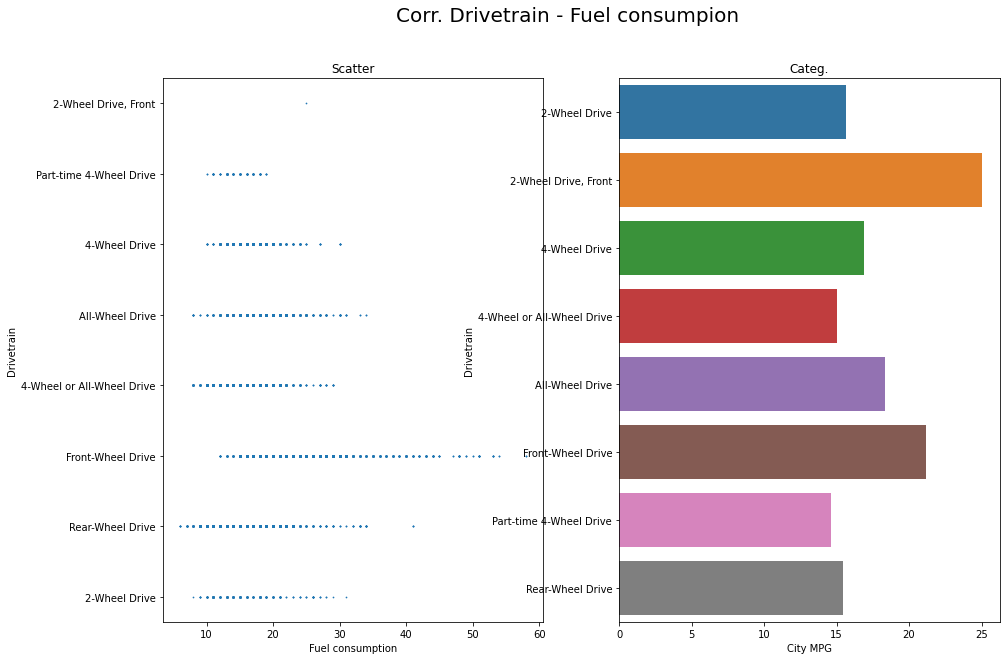

In [62]:
## plot 
fig, ax = plt.subplots(1,2, figsize = (15,10))
fig.suptitle('Corr. Drivetrain - Fuel consumpion', fontsize=20)

plt.subplot(1,2,1)
plt.scatter(cars['City MPG'], cars['Drivetrain'], s=.5)
plt.title("Scatter")
plt.xlabel("Fuel consumption")
plt.ylabel("Drivetrain")

plt.subplot(1,2,2)
sns.barplot(x='City MPG', y=drivetrain.index, data=drivetrain)
plt.title("Categ.")

In [63]:
## plot with plotly 
fig = px.bar(drivetrain, x='City MPG', y=drivetrain.index, 
             color=drivetrain.index, text_auto='.2s',
             title="Corr. Drivetrain - Fuel consumpion")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

Do cars with automatic transmission consume more fuel than cars with manual transmission?

In [64]:
def dummyTransmission(column):
    newCol = ['Automatic' if 'Automatic' in x else 'Manual' for x in column]
    return newCol

In [65]:
cars['dummyTransm'] = dummyTransmission(cars['Transmission'])
cars['dummyTransm'].head(4)

0    Automatic
1    Automatic
2    Automatic
3    Automatic
Name: dummyTransm, dtype: object

In [66]:
def moreConsuming(df): 
    transm = df.groupby(['dummyTransm'])[["City MPG"]].mean()
    print(colored("Do cars with automatic transmission consume more fuel than cars with manual transmission?\n", 'green', attrs=['bold', 'reverse']))
    if transm.loc['Automatic', 'City MPG'] > transm.loc['Manual', 'City MPG'] == True: 
        print(colored("YES", 'green', attrs=['reverse']))   
    else: 
        print(colored("NO", 'red', attrs=['reverse']))   


In [67]:
moreConsuming(cars)

Do cars with automatic transmission consume more fuel than cars with manual transmission?

NO


Use `groupby` and `agg` with different aggregation measures for different columns:

aggregate with average City_Km/Liter and the count of the Trans

In [68]:
def xxx(df, col): 
    qq = df.groupby(['Drivetrain']).aggregate({col: 'mean', 'dummyTransm': 'count'})
    return qq

In [69]:
xxx(cars, 'City MPG')

,City MPG,dummyTransm
Drivetrain,,
2-Wheel Drive,15.624113,423
"2-Wheel Drive, Front",25.000000,1
4-Wheel Drive,16.913989,1058
4-Wheel or All-Wheel Drive,15.035061,6503
All-Wheel Drive,18.312898,2039
Front-Wheel Drive,21.174563,13044
Part-time 4-Wheel Drive,14.620253,158
Rear-Wheel Drive,15.422049,12726


In [70]:
cars.groupby(['Drivetrain']).aggregate({'City MPG': 'mean', 'dummyTransm': 'count'})

,City MPG,dummyTransm
Drivetrain,,
2-Wheel Drive,15.624113,423
"2-Wheel Drive, Front",25.000000,1
4-Wheel Drive,16.913989,1058
4-Wheel or All-Wheel Drive,15.035061,6503
All-Wheel Drive,18.312898,2039
Front-Wheel Drive,21.174563,13044
Part-time 4-Wheel Drive,14.620253,158
Rear-Wheel Drive,15.422049,12726


In [71]:
cars.groupby(['Make', 'Drivetrain']).aggregate({'City MPG': 'mean', 'dummyTransm': 'count'})

City MPG  dummyTransm
Make                  Drivetrain                                        
AM General            2-Wheel Drive               15.500000            2
                      Rear-Wheel Drive            14.500000            2
ASC Incorporated      Rear-Wheel Drive            14.000000            1
Acura                 4-Wheel or All-Wheel Drive  15.125000           24
                      All-Wheel Drive             18.476190           42
...                                                     ...          ...
Volvo                 Rear-Wheel Drive            17.421622          185
Wallace Environmental 4-Wheel or All-Wheel Drive  11.000000            1
                      Rear-Wheel Drive            12.483871           31
Yugo                  Front-Wheel Drive           23.000000            8
smart                 Rear-Wheel Drive            33.300000           20

[298 rows x 2 columns]

aggregate with average City_Km/Liter and the minimum of the Trans

In [72]:
cars.groupby(['Make']).aggregate({'City MPG': 'mean', 'dummyTransm': 'count'})### your code is here

,City MPG,dummyTransm
Make,,
AM General,15.000000,4
ASC Incorporated,14.000000,1
Acura,18.890728,302
Alfa Romeo,17.097561,41
American Motors Corporation,16.045455,22
...,...,...
Volkswagen,21.226361,1047
Volvo,17.981869,717
Wallace Environmental,12.437500,32


In [77]:
cars.head(5)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year,CO2 Emission Grams/Km,City KmPL,decade,decade2,dummyTransm
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950,324.831736,42.338710,80,'80,Automatic
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550,424.779962,30.577957,80,'80,Automatic
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100,345.133719,37.634409,80,'80,Automatic
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550,424.779962,30.577957,80,'80,Automatic
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550,345.133719,32.930108,80,'80,Automatic


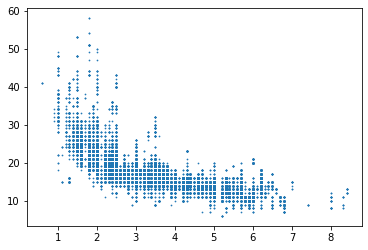

In [79]:
plt.scatter(cars['Engine Displacement'], cars['City MPG'], s=.5)

In [81]:
import scipy
scipy.stats.norm.pdf(cars['Engine Displacement'])

array([1.75283005e-02, 5.89430678e-05, 1.75283005e-02, ...,
       2.41970725e-01, 2.66085250e-01, 2.66085250e-01])

In [89]:
city = pd.read_csv("C:/Users/tomma/Documents/data_science/dataViz_td/Cities with the Best Work-Life Balance 2022.csv")
city.columns

Index(['2022', '2021', 'City', 'Country', 'Remote Jobs',
       'Overworked Population', 'Minimum Vacations Offered (Days)',
       'Vacations Taken (Days)', 'Unemployment', 'Multiple Jobholders',
       'Inflation', 'Paid Parental Leave (Days)', 'Covid Impact',
       'Covid Support', 'Healthcare', 'Access to Mental Healthcare',
       'Inclusivity & Tolerance', 'Affordability',
       'Happiness, Culture & Leisure', 'City Safety', 'Outdoor Spaces',
       'Air Quality', 'Wellness and Fitness', 'TOTAL SCORE'],
      dtype='object')

In [96]:
city.describe()

,2022,Minimum Vacations Offered (Days),Unemployment,Covid Impact,Covid Support,Healthcare,Access to Mental Healthcare,Inclusivity & Tolerance,Affordability,"Happiness, Culture & Leisure",City Safety,Outdoor Spaces,Air Quality,Wellness and Fitness,TOTAL SCORE
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.0000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,50.500000,14.410000,93.292000,77.875000,84.95300,88.753000,72.143000,88.7510,74.280000,81.474000,63.863000,84.826000,94.95200,64.404000,85.169200
std,29.011492,6.313518,5.888556,6.959949,6.91823,8.483537,8.688286,7.9538,10.427479,8.567081,17.062267,7.817225,6.07363,7.189666,7.619014
min,1.000000,6.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.0000,50.000000,50.000000,1.000000,50.000000,50.00000,50.000000,50.000000
25%,25.750000,10.000000,92.675000,74.150000,81.10000,86.000000,66.600000,85.9500,66.300000,77.550000,55.375000,80.800000,95.25000,59.775000,81.795000
50%,50.500000,10.000000,94.850000,78.350000,84.90000,89.000000,67.500000,90.1000,74.550000,82.700000,62.400000,85.550000,96.15000,63.200000,84.905000
75%,75.250000,20.000000,95.950000,82.350000,89.45000,94.800000,78.600000,93.5000,82.050000,86.325000,74.250000,90.100000,97.30000,67.625000,90.245000
max,100.000000,30.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.0000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000


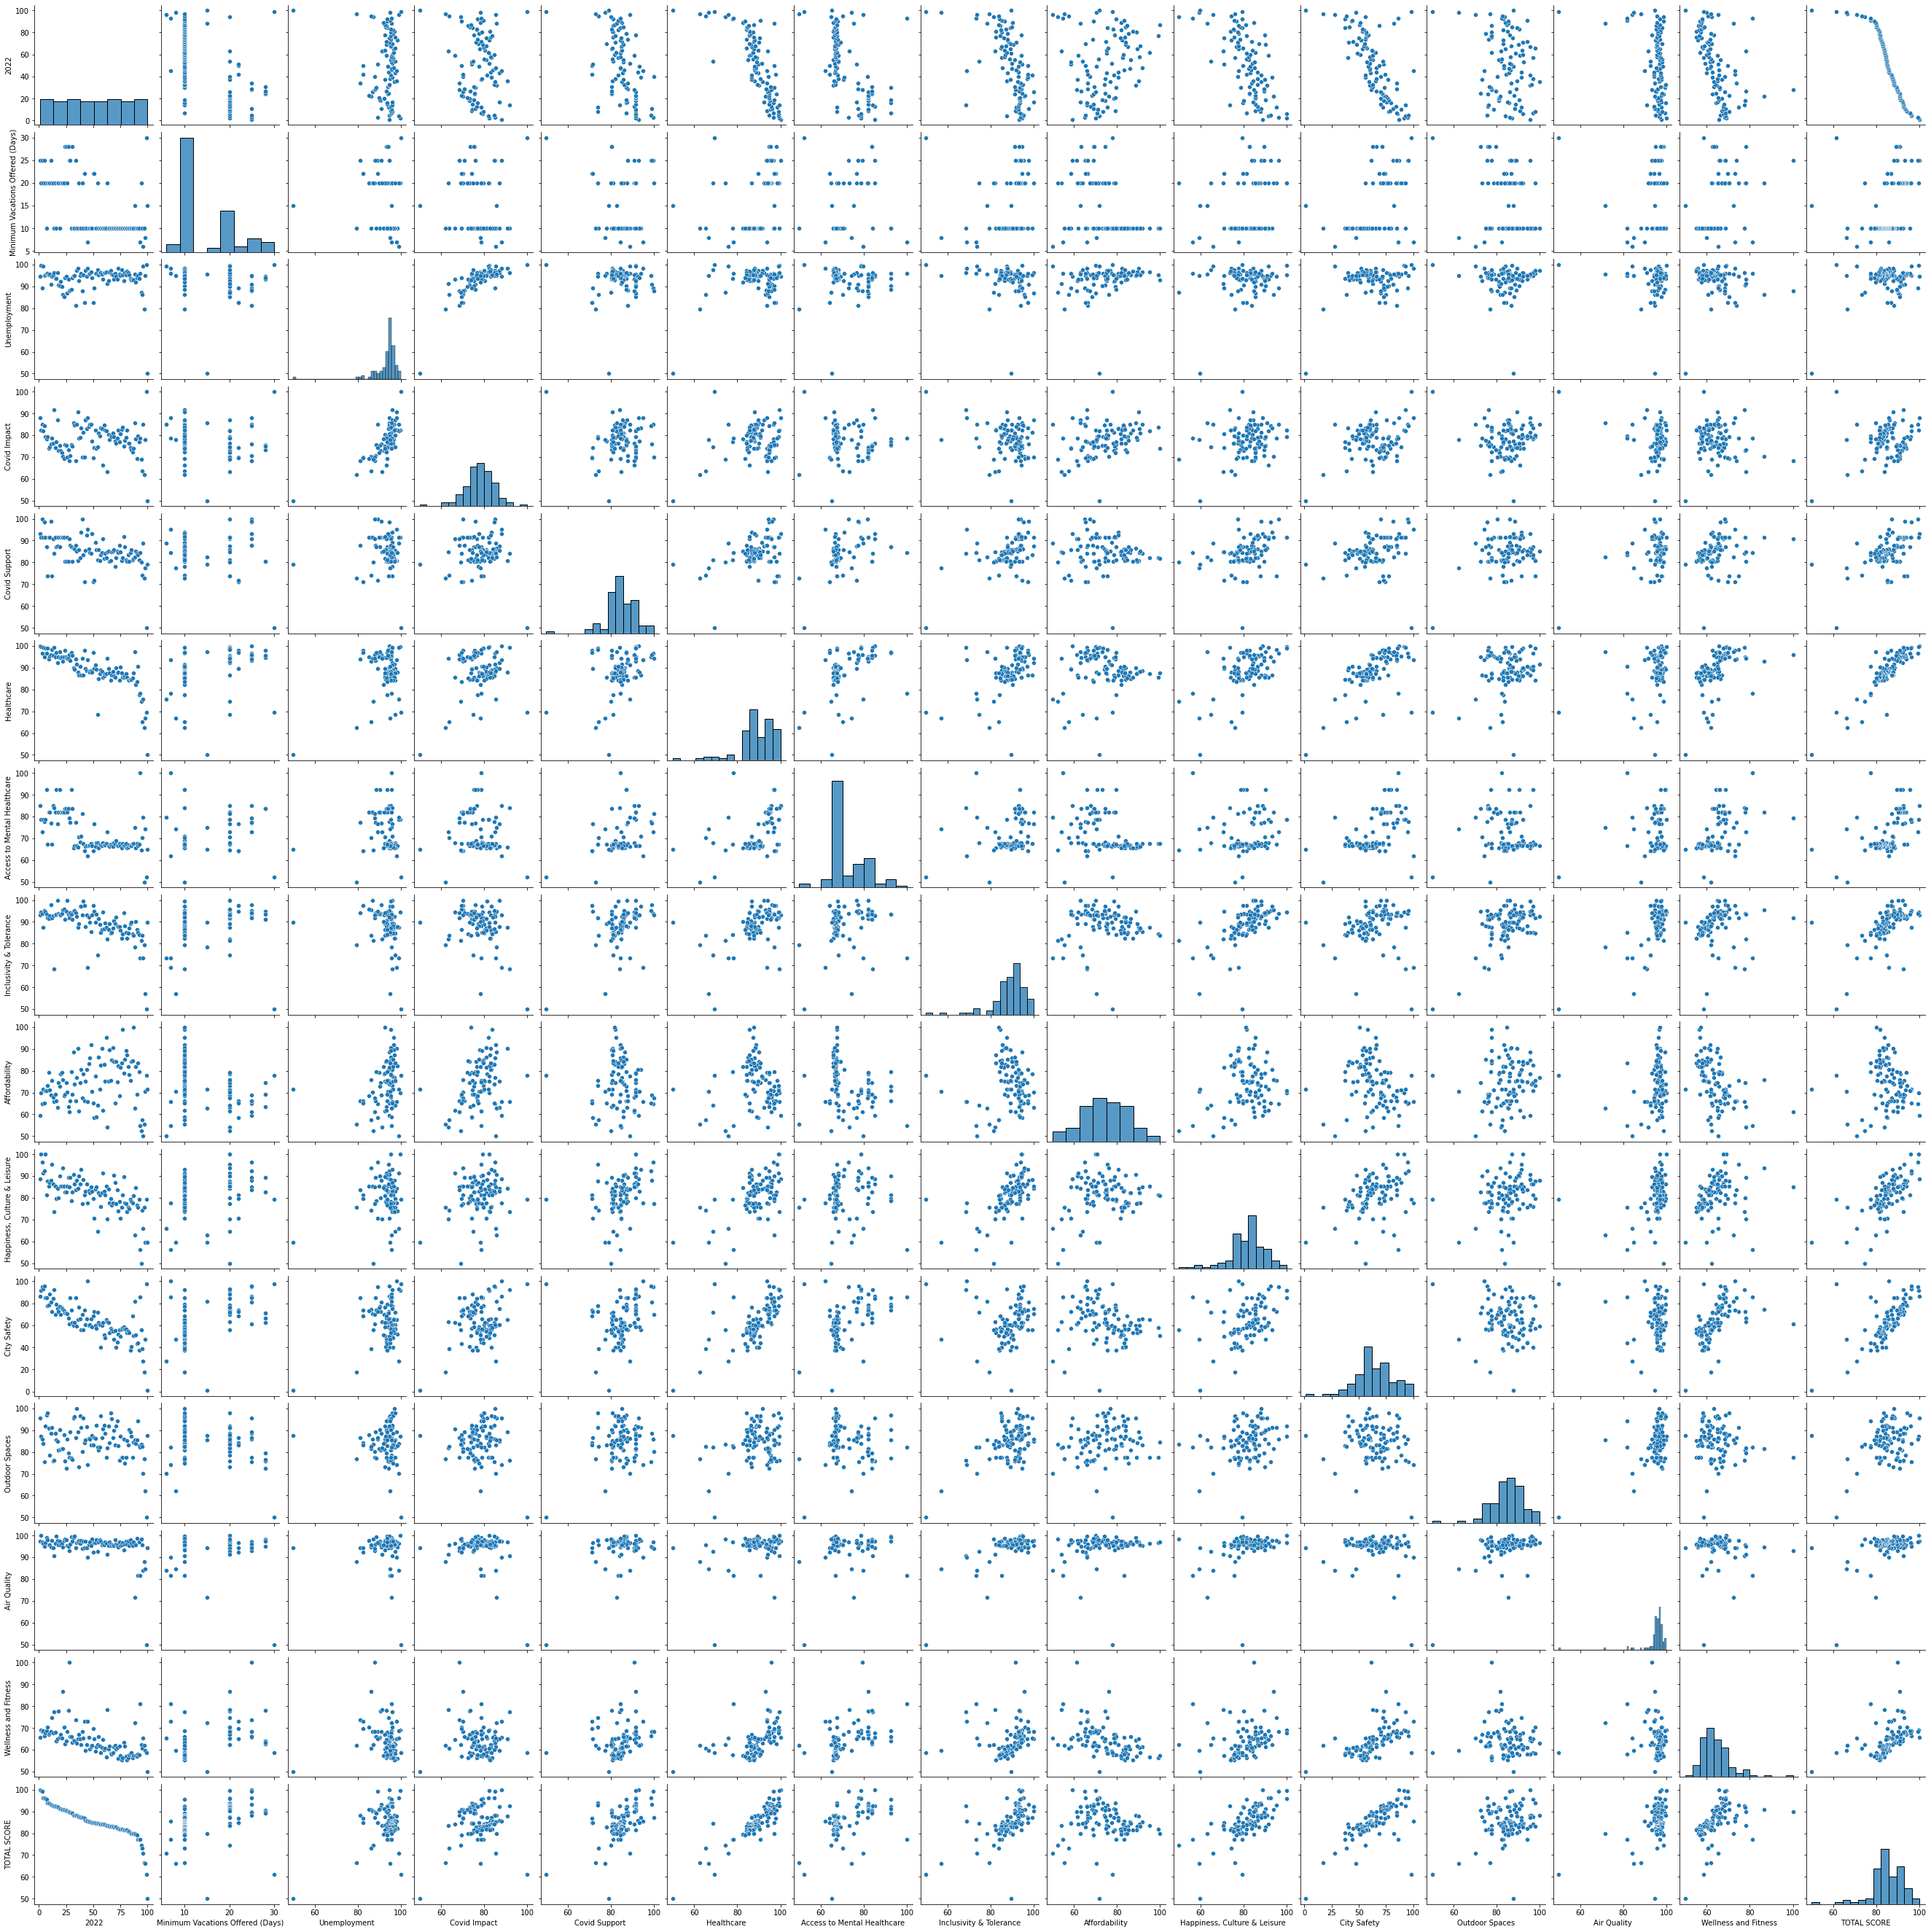

In [90]:
sns.pairplot(city, palette=None, kind='scatter',diag_kind='auto',
             height=2.5, aspect=1, size=None)

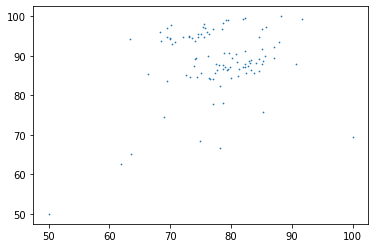

In [98]:
plt.scatter(city['Covid Impact'], city['Healthcare'], s=.5)


In [95]:
len(city.index)

100